In [1]:
import pandas as pd
import math
from datetime import datetime
import numpy as np
import re
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
Behaviors= pd.read_excel("Behaviors.xlsx",index_col=0)  
Bins= pd.read_excel("Bins.xlsx",index_col=0)  
Infrastructures= pd.read_excel("Infrastructures.xlsx",index_col=0)   

In [3]:
Infrastructures = Infrastructures.reset_index()
Bins = Bins.reset_index()

In [4]:
bins_mapping = {
    'זמן סיום מהמערכת' : 'End_Time',
    'יישוב': 'City',
    'סמל_יישוב': 'City_Code',
    'שעת הגעה לנקודה': 'Arrival_Time',
    'נ.צ כתובת': 'Coordinate_Address',
    'כתובת תיאור מיקום נקודת המדידה': 'Measurement_Point_Description',
    'סוגנ קודת המדידה': 'Point_Type',
    'האם יש פחים בנקודת המדידה': 'Has_Bins',
    'כמה פחים יש בנקודת המדידה': 'Bin_Count',
    'סוג': 'Type',
    'מצב הפח': 'Bin_Condition',
    'מפלס הפסולת בפח': 'Waste_Level',
    'מפלס הפסולת בפח במספר': 'Waste_Level_Number'
}

infrastructures_mapping = {
    'זמןסיוםמהמערכת' : 'End_Time',
    'יישוב': 'City',
    'סמל_יישוב': 'City_Code',
    'שעתהגעהלנקודה': 'Arrival_Time',
    'נ.צכתובת': 'Coordinate_Address',
    'כתובתתיאורמיקוםנקודתהמדידה': 'Measurement_Point_Description',
    'התרשמותכלליתמנקודתהמדידה': 'General_Impression',
    'מדרכה': 'Sidewalk',
    'אבנישפה': 'Curb',
    'גדרות': 'Fences',
    'צמחייה': 'Vegetation',
    'הערות': 'Remarks',
    'point_type': 'Point_Type'
}

Behaviors_mapping = {
    'זמןסיוםמהמערכת' : 'End_Time',
    'יישוב': 'City',
    'סמל_יישוב': 'City_Code',
    'שעתהגעהלנקודה': 'Arrival_Time',
    'נ.צכתובת': 'Coordinate_Address',
    'כתובתתיאורמיקוםנקודתהמדידה': 'Measurement_Point_Description',
}


In [5]:
bins_renamed = Bins.rename(columns=bins_mapping)
Behaviors_renamed = Behaviors.rename(columns=Behaviors_mapping)
infrastructures_renamed = Infrastructures.rename(columns=infrastructures_mapping)

In [6]:
Behaviors_renamed = Behaviors_renamed.drop(['City','gender','age','point_type','Arrival_Time','Coordinate_Address','time','parit','teortext','סוגנקודתהמדידהתשובה','Index1', 'heged1','heged2','heged3','heged4','heged5','heged6', 'heged7', 'heged8', 'heged9', 'heged10', 'heged11', 'heged12','heged13'], axis =1)
infrastructures_renamed = infrastructures_renamed.drop(['City', 'Arrival_Time','Coordinate_Address','Remarks'], axis=1)

In [7]:
Behaviors_renamed['teorshlilihiyuvi'] = Behaviors_renamed['teorshlilihiyuvi'].replace('שלילית', 'negative')
Behaviors_renamed['teorshlilihiyuvi'] = Behaviors_renamed['teorshlilihiyuvi'].replace('חיובית', 'positive')

In [8]:
Behaviors_renamed['Measurement_Point_Description'] = Behaviors_renamed['Measurement_Point_Description'].str.replace(r'[A-Za-z0-9_\n]', '', regex=True)
infrastructures_renamed['Measurement_Point_Description'] = infrastructures_renamed['Measurement_Point_Description'].str.replace(r'[A-Za-z0-9_\n]', '', regex=True)

In [9]:
Behaviors_renamed['End_Time'] = pd.to_datetime(Behaviors_renamed['End_Time'])
Behaviors_renamed['Date'] = Behaviors_renamed['End_Time'].dt.date

infrastructures_renamed['End_Time'] = pd.to_datetime(infrastructures_renamed['End_Time'])
infrastructures_renamed['Date'] = infrastructures_renamed['End_Time'].dt.date


In [10]:
Behaviors_renamed = Behaviors_renamed.drop(['End_Time'], axis =1)
infrastructures_renamed = infrastructures_renamed.drop(['End_Time'], axis =1)

From the Behaviors data, we want to know how many negative and positive behaviors there is per point and date

In [11]:
Behaviors_renamed.isnull().sum()

City_Code                          0
Measurement_Point_Description      0
teorshlilihiyuvi                 245
Date                               0
dtype: int64

In [12]:
Behaviors_drops = Behaviors_renamed.dropna()

# we dont have a way to fill nulls in the main column 

In [13]:
# count how many negative / positive per row, and fill 0 where we dont have a data for negative / positive for a row
aggregated_behaviors = Behaviors_renamed.groupby(["City_Code", "Measurement_Point_Description", "Date"])["teorshlilihiyuvi"].value_counts().unstack(fill_value=0).reset_index()


In [14]:
aggregated_behaviors

teorshlilihiyuvi,City_Code,Measurement_Point_Description,Date,negative,positive
0,2,אור הגנוז,2021-07-20,8,3
1,2,אשכול גנים טפחות,2021-07-20,1,2
2,2,בר יוחאי - מרכז הישוב,2021-07-21,2,0
3,2,גן שעשועים אור הגנוז,2021-07-20,4,0
4,2,חנייה קבר הרשב״י,2021-07-20,12,7
...,...,...,...,...,...
1493,9600,משה שרת,2021-07-20,2,1
1494,9600,פארק אשר,2021-07-21,4,1
1495,9600,פארק סביוני ים,2021-07-22,1,2
1496,9600,רחוב מגורים,2021-07-21,1,0


For the infrastructures columns, we renamd the values to english for later use.

In [15]:
status_mapping_dict = {
    'לא תקין (מוזנח)': 'poor',
    'סביר': 'good',
    'תקין (מטופח)': 'great',
    'לא רלוונטי':  pd.NA 
}

columns_to_replace = ["Sidewalk", "Curb", "Fences", "Vegetation"]

infrastructures_renamed[columns_to_replace]=infrastructures_renamed[columns_to_replace].replace(status_mapping_dict)


In [24]:
most_common = infrastructures_renamed.groupby('City_Code')[["Sidewalk", "Curb", "Fences", "Vegetation"]].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None)
for col in ['Sidewalk', 'Curb', 'Fences', 'Vegetation']:
    infrastructures_renamed[col] = infrastructures_renamed.apply(
        lambda row: most_common.at[row['City_Code'], col] 
        if pd.isna(row[col]) and row['City_Code'] in most_common.index 
        else row[col], axis=1
    )

In [33]:
data_for_unsupervised = infrastructures_renamed.dropna()

In [34]:
data_for_unsupervised = pd.merge(data_for_unsupervised, aggregated_behaviors, on=[
    "City_Code", "Measurement_Point_Description", "Date"], how='inner')	

City_Code                        0
Measurement_Point_Description    0
General_Impression               0
Sidewalk                         0
Curb                             0
Fences                           0
Vegetation                       0
Point_Type                       0
Date                             0
negative                         0
positive                         0
dtype: int64

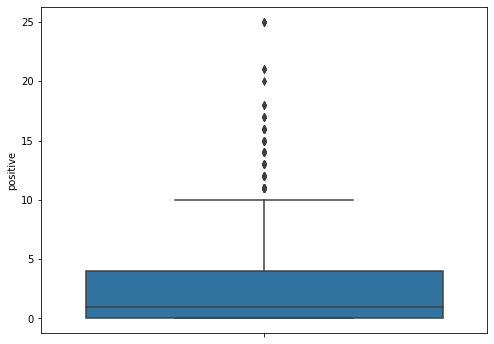

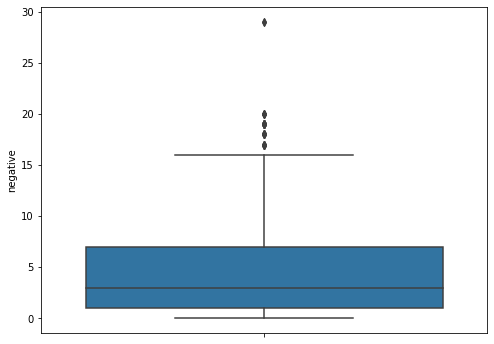

In [39]:
for col in ['positive', 'negative']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data_for_unsupervised, y=col)  
    plt.show()
## Doesn't seem like a daramatic outlires

In [43]:
for col in data_for_unsupervised.columns:
    if col not in ['Measurement_Point_Description', 'Point_Type']:
        if data_for_unsupervised[col].dtype not in ['int64', 'float64', 'datetime64[ns]']:
            data_for_unsupervised[col] = data_for_unsupervised[col].astype('category')

In [46]:
#### SAME AS FOR CLASSIFICATIONS ####

## Dates Fetching
data_for_unsupervised['Day_Of_Week'] = data_for_unsupervised.Date.dt.dayofweek
data_for_unsupervised['Month'] = data_for_unsupervised.Date.dt.month

data_for_unsupervised = data_for_unsupervised.drop(['Date'], axis=1)
data_for_unsupervised[['Month', 'Day_Of_Week']] = data_for_unsupervised[['Month', 'Day_Of_Week']] = data_for_unsupervised[['Month', 'Day_Of_Week']].astype('category')

## Fetching Point_type
data_for_unsupervised[['Point_Type']] = data_for_unsupervised[['Point_Type']] = data_for_unsupervised[['Point_Type']].astype('category')

## City Fetching - Avoiding OverFitting
economical_status = pd.read_excel("economical_status.xlsx")  
economical_status = economical_status[economical_status['Unnamed: 2'].notnull()].reset_index()
economical_status = economical_status.iloc[1:, [2, 7, 9]]
columns_rename_e = ['City_Code','Area_code', 'Economical_Rate']
economical_status.columns = columns_rename_e
economical_status['Economical_Rate'] = economical_status['Economical_Rate'].astype('Float64')
economical_status = economical_status.groupby(['City_Code'], as_index=False).agg({'Economical_Rate': 'mean'})
economical_status

## City Fetching - Avoiding OverFitting
location_rank = pd.read_excel("location_rank.xlsx")  
location_rank = location_rank.iloc[6:, [3, 9]]
columns_rename_l = ['City_Code','Location_Rate']
location_rank.columns = columns_rename_l
location_rank['Location_Rate'] = location_rank['Location_Rate'].astype('Float64')
location_rank = location_rank.groupby(['City_Code'], as_index=False).agg({'Location_Rate': 'mean'})
location_rank

## City Fetching - Avoiding OverFitting
data_for_unsupervised = pd.merge(data_for_unsupervised, economical_status, on=[
    "City_Code"], how='inner')
data_for_unsupervised = pd.merge(data_for_unsupervised, location_rank, on=[
    "City_Code"], how='inner')
len(data_for_unsupervised)

924

In [47]:
## Street Fetching - Avoiding OverFitting 
def classify_street(street):
    if any(keyword in street for keyword in ['דיין', 'הרצל', 'גוריון', 'רוטשילד', 'בגין', 'דיזינגוף']):
        return 'Main'
    if any(keyword in street for keyword in ['פארק', 'גן']):
        return 'Park'
    if any(keyword in street for keyword in ['קניון', 'מרכז מסחרי', 'שוק']):
        return 'Commercial'
    if any(keyword in street for keyword in ['תחנת דלק', 'תחנת רכבת']):
        return 'Transportation'
    if any(keyword in street for keyword in ['בית ספר', 'מתנ"ס', 'קופת חולים']):
        return 'Public Facility'
    if any(keyword in street for keyword in [
    'מכללת' , 'שדרה', 'דרך', 'מרכז', 'מכללה', 'טיילת', 'כיכר']):  
        return 'Popular'
    return 'Other'

data_for_unsupervised['Street_Group'] = data_for_unsupervised['Measurement_Point_Description'].apply(lambda x: classify_street(x))

data_for_unsupervised['Street_Group'].value_counts() ## We will try to see the result of the model with the 'Other' group.
## if the result will be poor, we will try to delete it.

Other              662
Park               108
Commercial          66
Popular             51
Main                22
Public Facility     12
Transportation       3
Name: Street_Group, dtype: int64

In [51]:
data_for_unsupervised.head()

,City_Code,Measurement_Point_Description,General_Impression,Sidewalk,Curb,Fences,Vegetation,Point_Type,negative,positive,Street_Group,Day_Of_Week,Month,Economical_Rate,Location_Rate
0,8500,רחוב זכריה,3,good,good,good,good,רחוב מגורים,0,6,Other,2,7,-0.535233,1.272301
1,8500,בן גוריון,3,poor,good,good,poor,רחוב מגורים,5,0,Main,0,7,-0.535233,1.272301
2,8500,רחוב בן צבי,2,great,good,great,poor,רחוב מגורים,11,1,Other,0,7,-0.535233,1.272301
3,8500,יהודה שטיין כיכר גיבורי ישראל,2,great,good,poor,great,רחוב מגורים,17,3,Popular,0,7,-0.535233,1.272301
4,8500,רחוב הצנחנים,4,poor,good,great,poor,רחוב מגורים,7,2,Other,1,7,-0.535233,1.272301
